<a href="https://colab.research.google.com/github/shaswatidash8/ECG_model/blob/main/ecg_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Name: Deep Learning Modelling of ECG data**

In [1060]:
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt # for plotting data and creating different charts.
from sklearn.model_selection import KFold
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D,LeakyReLU
from tensorflow.keras.layers import Dense,Flatten,Dropout,MaxPool1D,GRU
from tensorflow.keras.layers import GlobalAveragePooling1D,AveragePooling1D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.backend import clear_session
from tensorflow.keras import backend as K
from sklearn.metrics import confusion_matrix,classification_report
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')  
from scipy.io import loadmat
import numpy as np
import PIL
import cv2
import os
import seaborn as sns

In [1061]:
# Print tensorfow (TF) version. Make sure you have at least tensorflow 2.1.0
print(f"Tensorflow version: {tf.version.VERSION}")

Tensorflow version: 2.7.0


In [1062]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1063]:
#used PTB Diagnostic ECG database
#Link to database: https://physionet.org/content/ptbdb/1.0.0/
x = np.asarray(loadmat('/content/drive/MyDrive/ECG_DATA/Xdata.mat')['Xdata']) #loaded input dataset
y = np.asarray(loadmat('/content/drive/MyDrive/ECG_DATA/ydata.mat')['ydata']) #loaded output dataset

In [1064]:
print(x)

[[[-0.088  -0.326  -0.238  ... -0.32   -0.3225 -0.358 ]
  [-0.103  -0.3325 -0.2295 ... -0.3065 -0.318  -0.3595]
  [-0.1155 -0.339  -0.2235 ... -0.2925 -0.3155 -0.3605]
  ...
  [-0.0405 -0.3345 -0.294  ... -0.429  -0.4035 -0.3785]
  [-0.0405 -0.3355 -0.295  ... -0.4305 -0.4035 -0.381 ]
  [-0.0435 -0.34   -0.297  ... -0.429  -0.402  -0.381 ]]

 [[-0.145  -0.009   0.136  ... -0.1785 -0.2055 -0.244 ]
  [-0.14   -0.011   0.1295 ... -0.159  -0.19   -0.2355]
  [-0.1385 -0.0135  0.125  ... -0.1465 -0.1775 -0.2275]
  ...
  [-0.0555  0.1885  0.244  ...  0.1315  0.0585 -0.059 ]
  [-0.052   0.1935  0.2455 ...  0.146   0.067  -0.055 ]
  [-0.0535  0.1975  0.251  ...  0.1535  0.074  -0.05  ]]

 [[ 0.4205  2.069   1.6485 ...  0.769   0.516   0.341 ]
  [ 0.4305  2.065   1.6345 ...  0.768   0.513   0.339 ]
  [ 0.436   2.0665  1.63   ...  0.7605  0.5075  0.3345]
  ...
  [ 0.4665  1.782   1.3155 ...  1.0815  0.7235  0.434 ]
  [ 0.468   1.7825  1.3145 ...  1.0805  0.722   0.4325]
  [ 0.4725  1.781   1.3085

In [1065]:
print(y)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [1066]:
x.shape #173 points, 4000 sample, 12 leads

(173, 4000, 12)

In [1067]:
y.shape #0-normal ECG, 1-myocardial infraction

(173, 1)

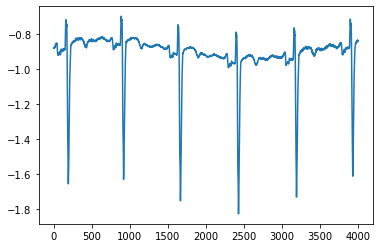

In [1068]:
plt.plot(x[10,:,7]) #normal ECG signal

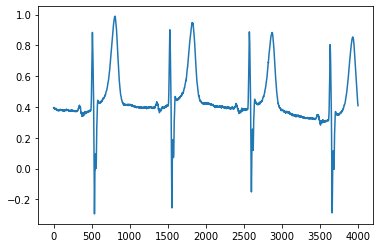

In [1069]:
plt.plot(x[120,:,7]) #Myocardial infarction ECG signal

In [1070]:
#preparing the training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=1)

In [1071]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(108, 4000, 12) (52, 4000, 12) (108, 1) (52, 1)


In [1072]:
y_val.shape

(13, 1)

In [1073]:
#def model_define():
 # model=Sequential()
  #model.add(Conv1D(filters=32, kernel_size=7, activation='relu',input_shape=(4000,12)))
  #model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
  #model.add(BatchNormalization())
  #model.add(Dropout(0.5))
  #model.add(Flatten())
  #model.add(Dense(500, activation='relu'))
  #model.add(Dense(60, activation='relu'))
  #model.add(Dropout(0.1))
  #model.add(Dense(1,activation='sigmoid'))
  #return model

In [1074]:
#CNN model
def model_define():
  clear_session()
  model=Sequential()
  model.add(Conv1D(filters=16, kernel_size=5, strides=1, input_shape=(4000,12))) #1
  model.add(BatchNormalization())
  model.add(LeakyReLU())
  model.add(MaxPool1D(pool_size=2,strides=2)) #2
  model.add(Conv1D(filters=32, kernel_size=5, strides=1)) #3
  model.add(LeakyReLU())
  model.add(MaxPool1D(pool_size=2,strides=2)) #4
  model.add(Dropout(0.5))
  model.add(Conv1D(filters=64, kernel_size=5, strides=1)) #5
  model.add(LeakyReLU())
  model.add(AveragePooling1D(pool_size=4,strides=2)) #6
  model.add(Dropout(0.5))
  model.add(Conv1D(filters=128, kernel_size=5, strides=1)) #7
  model.add(LeakyReLU())
  model.add(AveragePooling1D(pool_size=2,strides=2)) #8
  model.add(Conv1D(filters=256, kernel_size=5, strides=1)) #9
  model.add(LeakyReLU())
  model.add(GlobalAveragePooling1D()) #10
  model.add(Dense(1,activation='sigmoid')) #11
  return model

In [1075]:
#K.clear_session()
modelf = model_define()

print(modelf.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 3996, 16)          976       
                                                                 
 batch_normalization (BatchN  (None, 3996, 16)         64        
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 3996, 16)          0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1998, 16)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 1994, 32)          2592      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 1994, 32)          0

In [1076]:
modelf.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
history=modelf.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20)
print(history)

Epoch 1/20
4/4 [==============================] - 2s 135ms/step - loss: 0.7233 - accuracy: 0.5833 - val_loss: 0.5874 - val_accuracy: 0.7692
Epoch 2/20
4/4 [==============================] - 0s 49ms/step - loss: 0.6977 - accuracy: 0.5093 - val_loss: 0.5719 - val_accuracy: 0.8462
Epoch 3/20
4/4 [==============================] - 0s 42ms/step - loss: 0.6540 - accuracy: 0.5833 - val_loss: 0.6154 - val_accuracy: 0.6923
Epoch 4/20
4/4 [==============================] - 0s 41ms/step - loss: 0.6377 - accuracy: 0.5833 - val_loss: 0.5923 - val_accuracy: 0.6923
Epoch 5/20
4/4 [==============================] - 0s 40ms/step - loss: 0.6113 - accuracy: 0.5833 - val_loss: 0.6229 - val_accuracy: 0.7692
Epoch 6/20
4/4 [==============================] - 0s 43ms/step - loss: 0.6048 - accuracy: 0.6389 - val_loss: 0.6407 - val_accuracy: 0.5385
Epoch 7/20
4/4 [==============================] - 0s 40ms/step - loss: 0.5935 - accuracy: 0.6296 - val_loss: 0.6092 - val_accuracy: 0.7692
Epoch 8/20
4/4 [==========

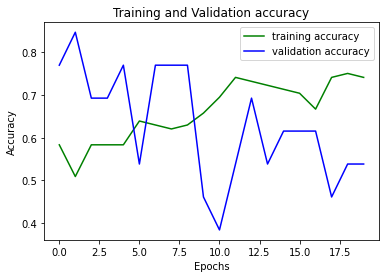

In [1077]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(0,20)
plt.plot(epochs, loss_train, 'g', label='training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [1078]:
h=modelf.predict(x_test)
y_pred=h>0.5
y_pred=y_pred.astype(int)
y_pred.shape
#print(y_pred.shape)

if (y_pred[1] == 0): #change
  print('The person is Normal.')
else:
  print('The person is having Myocardial Infraction.')

  print(y_pred)

The person is having Myocardial Infraction.
[[0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]]


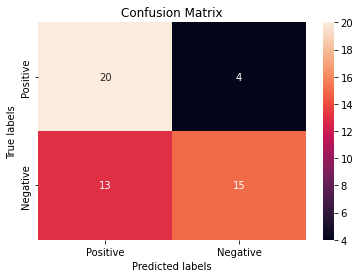

In [1079]:
cm=confusion_matrix(y_test, y_pred)
#print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative']);

In [1080]:
accuracy=(cm[0][0]+cm[1][1])/(len(y_test))
print('accuracy=',accuracy)

accuracy= 0.6730769230769231


In [1081]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.61      0.83      0.70        24
     class 1       0.79      0.54      0.64        28

    accuracy                           0.67        52
   macro avg       0.70      0.68      0.67        52
weighted avg       0.70      0.67      0.67        52

